## Loading dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

# Load datasets
train_separable = pd.read_csv('../../input/A2-ring/A2-ring-separable.txt', sep="\t", header=None)
train_merged = pd.read_csv('../../input/A2-ring/A2-ring-merged.txt', sep="\t", header=None)
test = pd.read_csv('../../input/A2-ring/A2-ring-test.txt', sep="\t", header=None)

columns = ['Feature1', 'Feature2', 'Class']
train_separable.columns = columns
train_merged.columns = columns
test.columns = columns


## Data Visualization

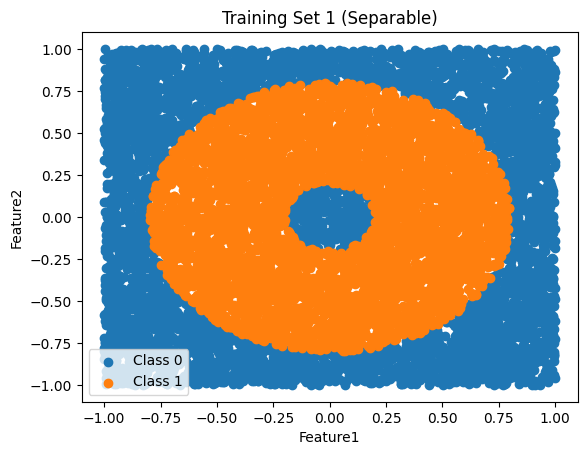

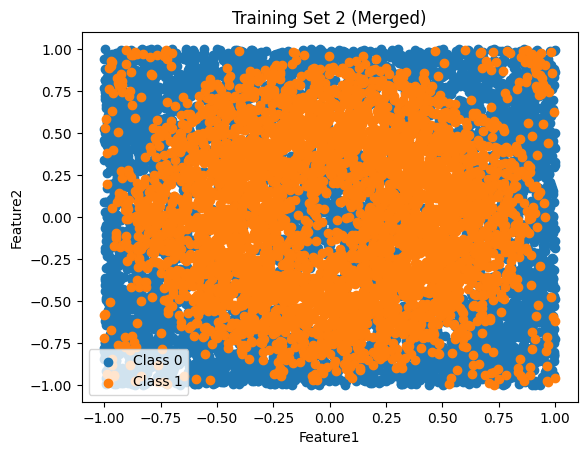

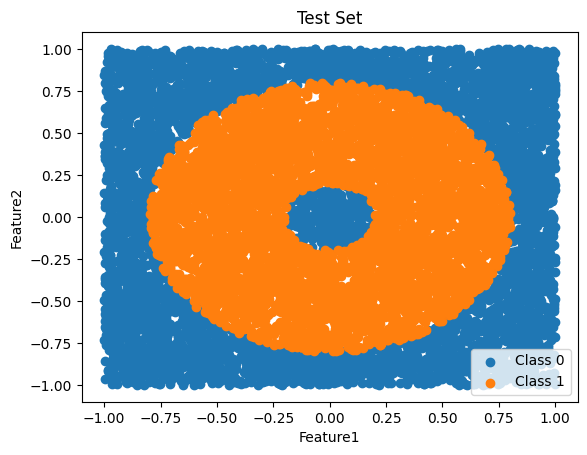

In [10]:
def plot_data(df, title):
    plt.scatter(df[df['Class'] == 0]['Feature1'], df[df['Class'] == 0]['Feature2'], label='Class 0')
    plt.scatter(df[df['Class'] == 1]['Feature1'], df[df['Class'] == 1]['Feature2'], label='Class 1')
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend()
    plt.show()

plot_data(train_separable, 'Training Set 1 (Separable)')
plot_data(train_merged, 'Training Set 2 (Merged)')
plot_data(test, 'Test Set')



## Training the SVM Model

In [5]:
# For separable dataset
X_train_sep = train_separable[['Feature1', 'Feature2']]
y_train_sep = train_separable['Class']
model_sep = svm.SVC(kernel='linear')
model_sep.fit(X_train_sep, y_train_sep)


SVC(kernel='linear')

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Example using SVM
kf = KFold(n_splits=5)  # 5-fold cross-validation
errors = []

for train_index, val_index in kf.split(X_train_sep):
    X_train, X_val = X_train_sep.iloc[train_index], X_train_sep.iloc[val_index]
    y_train, y_val = y_train_sep.iloc[train_index], y_train_sep.iloc[val_index]
    
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    error = 100 * (fp + fn) / (tp + tn + fp + fn)
    errors.append(error)

average_error = np.mean(errors)
print(f"Average Classification Error: {average_error}%")


Average Classification Error: 47.97%


## Testing the Model

In [6]:
X_test = test[['Feature1', 'Feature2']]
y_test = test['Class']

y_pred_sep = model_sep.predict(X_test)

## Visualization of Decision Boundaries

/Users/sebi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


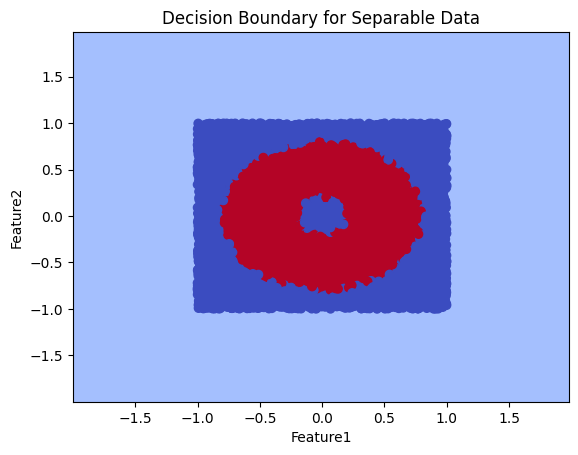

In [7]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
    y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title(title)

plot_decision_boundary(model_sep, X_train_sep, y_train_sep, 'Decision Boundary for Separable Data')


## Evaluation

In [8]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_sep)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_sep))


Accuracy: 0.5333
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      5333
           1       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000



/Users/sebi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu